In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import nltk
from nltk.corpus import stopwords
from string import punctuation
import warnings
from langdetect import detect_langs

warnings.filterwarnings("ignore")

df = pd.read_csv('data/fake_or_real_news.csv')

#替换列名
df.rename(columns={"label":"fake"}, inplace=True)
label_map = {"FAKE": 1, "REAL": 0}
df['fake'] = df['fake'].map(label_map)

#丢掉非英文的
def return_lang(x):
    try:
        language = detect_langs(x)[0].lang
    except Exception:
        language = 'other'
    return language
df['language'] = df['text'].apply(return_lang)


df = df[df['language']=='en']

#丢掉无用的列
df = df.drop(['Unnamed: 0','title_vectors','language'],axis=1)

print(df.head())

                                               title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text  fake  
0  Daniel Greenfield, a Shillman Journalism Fello...     1  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...     1  
2  U.S. Secretary of State John F. Kerry said Mon...     0  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...     1  
4  It's primary day in New York and front-runners...     0  


In [163]:
import nltk

def splitSentence(paragraph):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = tokenizer.tokenize(paragraph)
    return sentences

def divide_text1(x):
    text = x['text']
    temp = splitSentence(text)
    text1=""
    for i in range(int(len(temp)/2)):
        text1=text1+temp[i]+" "
    return text1
def divide_text2(x):
    text = x['text']
    temp = splitSentence(text)
    text2=""
    for i in range(int(len(temp)/2),len(temp)):
        text2=text2+temp[i]+" "
    return text2
df['text1'] = df.apply(divide_text1,axis=1)
df['text2'] = df.apply(divide_text2,axis=1)

In [3]:
df

,title,text,fake,text1,text2
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,"Daniel Greenfield, a Shillman Journalism Fello...",Going to war with the FBI is not the behavior ...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,Google Pinterest Digg Linkedin Reddit Stumbleu...,If Ryan’s career manages to limp all the way t...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,U.S. Secretary of State John F. Kerry said Mon...,The highest ranking U.S. officials attending t...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",Democrats nominated the only damn candidate wh...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,It's primary day in New York and front-runners...,Trump needs to capture more than 50 percent of...
5,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",1,"\nI’m not an immigrant, but my grandparents ...","Often, I discovered, those same bullies could ..."
6,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",1,"Share This Baylee Luciani (left), Screenshot o...","“I was scared, because they were saying I’m go..."
7,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,0,A Czech stockbroker who saved more than 650 Je...,Though the children were originally set to arr...
8,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,0,Hillary Clinton and Donald Trump made some ina...,Trump referred to the fact that Cuba’s preside...
9,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,0,Iranian negotiators reportedly have made a las...,A senior U.S. official characterized the issue...


In [4]:
import re

#正则表达式去掉一些无用的形式
def execute(x):
    temp=x
    pat1 = "[a-zA-Z]+'t"
    #否定词全部变为not
    temp = re.sub(pat1, 'not', temp)
    pat2 = "[a-zA-Z]+’t"
    #否定词全部变为not
    temp = re.sub(pat2, 'not', temp)
    #邮箱地址
    pat3="[\w!#$%&'*+/=?^_`{|}~-]+(?:\.[\w!#$%&'*+/=?^_`{|}~-]+)*@(?:[\w](?:[\w-]*[\w])?\.)+[\w](?:[\w-]*[\w])?"
    temp = re.sub(pat3, 'email', temp)
    #url网址
    pat4="[a-zA-z]+://[^\s]*"
    temp = re.sub(pat4, 'url', temp)
    #日期
    pat5="([0-9]{3}[1-9]|[0-9]{2}[1-9][0-9]{1}|[0-9]{1}[1-9][0-9]{2}|[1-9][0-9]{3})-(((0[13578]|1[02])-(0[1-9]|[12][0-9]|3[01]))|((0[469]|11)-(0[1-9]|[12][0-9]|30))|(02-(0[1-9]|[1][0-9]|2[0-8])))"
    temp = re.sub(pat5, 'date', temp)
    #电话号码 qq号码等 各种数字串
    pat6="[0-9]+"
    temp = re.sub(pat6, 'number', temp)
    return temp

def text_execute(x):
    return execute(x['text'])

def title_execute(x):
    return execute(x['title'])
    

df['text'] = df.apply(text_execute,axis=1)
df['title'] = df.apply(title_execute,axis=1)

df_fake=df[df['fake']==1]
df_real=df[df['fake']==0]

df_fake_test = df_fake.sample(frac=0.3)
df_fake_train = pd.merge(df_fake, df_fake_test, how='left', indicator=True).query("_merge=='left_only'").drop('_merge', 1)

df_real_test = df_real.sample(frac=0.3)
df_real_train = pd.merge(df_real, df_real_test, how='left', indicator=True).query("_merge=='left_only'").drop('_merge', 1)

In [5]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from string import punctuation

def clean_text(tokenized_list, sw):
    new_list = []
    for doc in tokenized_list:
        new_list.append([token.lower() for token in doc if token.lower() not in sw])
    return new_list

stop_words = stopwords.words('english')
punctuation = punctuation+"‘’“”，。、？（）！#：；《》【】~·……—"
mapping_table = {ord(char): u' ' for char in punctuation}

#text1
texts1_fake_train = df_fake_train.text1.values
tokenized_fake_text1_train = [nltk.word_tokenize(line.translate(mapping_table)) for line in texts1_fake_train]
cleaned_fake_text1_train = clean_text(tokenized_fake_text1_train, stop_words)

texts1_real_train = df_real_train.text1.values
tokenized_real_text1_train = [nltk.word_tokenize(line.translate(mapping_table)) for line in texts1_real_train]
cleaned_real_text1_train = clean_text(tokenized_real_text1_train, stop_words)

texts1_fake_test = df_fake_test.text1.values
tokenized_fake_text1_test = [nltk.word_tokenize(line.translate(mapping_table)) for line in texts1_fake_test]
cleaned_fake_text1_test = clean_text(tokenized_fake_text1_test, stop_words)

texts1_real_test = df_real_test.text1.values
tokenized_real_text1_test = [nltk.word_tokenize(line.translate(mapping_table)) for line in texts1_real_test]
cleaned_real_text1_test = clean_text(tokenized_real_text1_test, stop_words)


#text2
texts2_fake_train = df_fake_train.text2.values
tokenized_fake_text2_train = [nltk.word_tokenize(line.translate(mapping_table)) for line in texts2_fake_train]
cleaned_fake_text2_train = clean_text(tokenized_fake_text2_train, stop_words)

texts2_real_train = df_real_train.text2.values
tokenized_real_text2_train = [nltk.word_tokenize(line.translate(mapping_table)) for line in texts2_real_train]
cleaned_real_text2_train = clean_text(tokenized_real_text2_train, stop_words)

texts2_fake_test = df_fake_test.text2.values
tokenized_fake_text2_test = [nltk.word_tokenize(line.translate(mapping_table)) for line in texts2_fake_test]
cleaned_fake_text2_test = clean_text(tokenized_fake_text2_test, stop_words)

texts2_real_test = df_real_test.text2.values
tokenized_real_text2_test = [nltk.word_tokenize(line.translate(mapping_table)) for line in texts2_real_test]
cleaned_real_text2_test = clean_text(tokenized_real_text2_test, stop_words)

In [113]:
#title
title_fake_train = df_fake_train.title.values
tokenized_fake_title_train = [nltk.word_tokenize(line.translate(mapping_table)) for line in title_fake_train]
cleaned_fake_title_train = clean_text(tokenized_fake_title_train, stop_words)

title_real_train = df_real_train.title.values
tokenized_real_title_train = [nltk.word_tokenize(line.translate(mapping_table)) for line in title_real_train]
cleaned_real_title_train = clean_text(tokenized_real_title_train, stop_words)

title_fake_test = df_fake_test.title.values
tokenized_fake_title_test = [nltk.word_tokenize(line.translate(mapping_table)) for line in title_fake_test]
cleaned_fake_title_test = clean_text(tokenized_fake_title_test, stop_words)

title_real_test = df_real_test.title.values
tokenized_real_title_test = [nltk.word_tokenize(line.translate(mapping_table)) for line in title_real_test]
cleaned_real_title_test = clean_text(tokenized_real_title_test, stop_words)

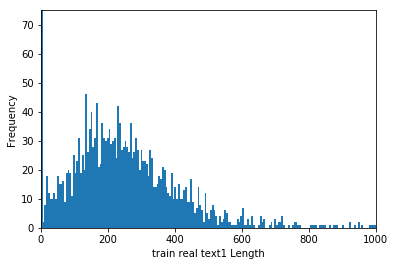

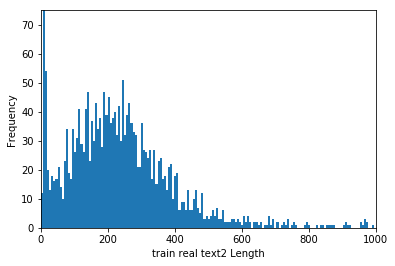

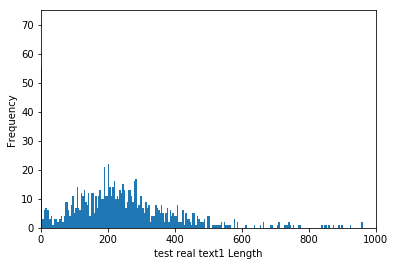

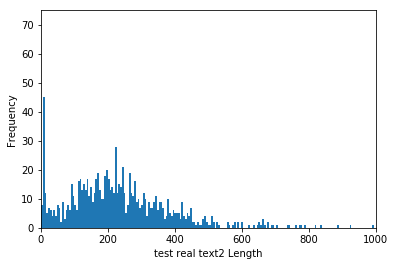

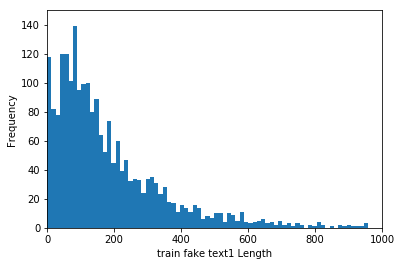

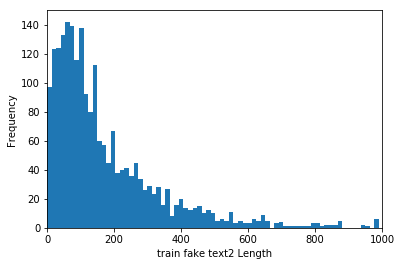

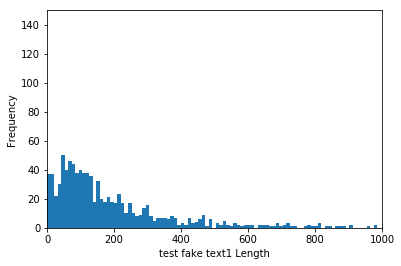

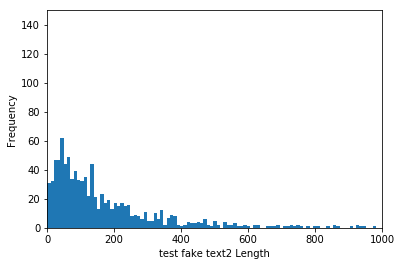

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

numWords=[]
for item in cleaned_real_text1_train:
    numWords.append(len(item))

plt.hist(numWords, bins=400)
plt.xlabel('train real text1 Length')
plt.ylabel('Frequency')
plt.axis([0, 1000, 0, 75])
plt.show()

numWords=[]
for item in cleaned_real_text2_train:
    numWords.append(len(item))

plt.hist(numWords, bins=400)
plt.xlabel('train real text2 Length')
plt.ylabel('Frequency')
plt.axis([0, 1000, 0, 75])
plt.show()

numWords=[]
for item in cleaned_real_text1_test:
    numWords.append(len(item))

plt.hist(numWords, bins=400)
plt.xlabel('test real text1 Length')
plt.ylabel('Frequency')
plt.axis([0, 1000, 0, 75])
plt.show()

numWords=[]
for item in cleaned_real_text2_test:
    numWords.append(len(item))

plt.hist(numWords, bins=400)
plt.xlabel('test real text2 Length')
plt.ylabel('Frequency')
plt.axis([0, 1000, 0, 75])
plt.show()

numWords=[]
for item in cleaned_fake_text1_train:
    numWords.append(len(item))

plt.hist(numWords, bins=400)
plt.xlabel('train fake text1 Length')
plt.ylabel('Frequency')
plt.axis([0, 1000, 0, 150])
plt.show()

numWords=[]
for item in cleaned_fake_text2_train:
    numWords.append(len(item))

plt.hist(numWords, bins=400)
plt.xlabel('train fake text2 Length')
plt.ylabel('Frequency')
plt.axis([0, 1000, 0, 150])
plt.show()

numWords=[]
for item in cleaned_fake_text1_test:
    numWords.append(len(item))

plt.hist(numWords, bins=400)
plt.xlabel('test fake text1 Length')
plt.ylabel('Frequency')
plt.axis([0, 1000, 0, 150])
plt.show()

numWords=[]
for item in cleaned_fake_text2_test:
    numWords.append(len(item))

plt.hist(numWords, bins=400)
plt.xlabel('test fake text2 Length')
plt.ylabel('Frequency')
plt.axis([0, 1000, 0, 150])
plt.show()

In [8]:
import numpy as np

wordsList = np.load('./data/wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('./data/wordVectors.npy')
print ('Loaded the word vectors!')
print(len(wordsList))
print(wordVectors.shape)

Loaded the word list!
Loaded the word vectors!
400000
(400000, 50)


In [16]:
#text1 section
text1_maxSeqLength = 200

ids_real_text1_train = np.zeros((len(cleaned_real_text1_train), text1_maxSeqLength), dtype='int32')
fileCounter = 0
for text1 in cleaned_real_text1_train:
    indexCounter = 0
    for word in text1:
        try:
            ids_real_text1_train[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            ids_real_text1_train[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= text1_maxSeqLength:
            break
    fileCounter = fileCounter + 1 
    if fileCounter%10000==0:
        print(fileCounter)

np.save('data/idsMatrix_real_text1_train', ids_real_text1_train)
print("ids_real_text1_train over")

ids_fake_text1_train = np.zeros((len(cleaned_fake_text1_train), text1_maxSeqLength), dtype='int32')
fileCounter = 0
for text1 in cleaned_fake_text1_train:
    indexCounter = 0
    for word in text1:
        try:
            ids_fake_text1_train[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            ids_fake_text1_train[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= text1_maxSeqLength:
            break
    fileCounter = fileCounter + 1 

np.save('data/idsMatrix_fake_text1_train', ids_fake_text1_train)
print("ids_fake_text1_train over")

ids_real_text1_test = np.zeros((len(cleaned_real_text1_test), text1_maxSeqLength), dtype='int32')
fileCounter = 0
for text1 in cleaned_real_text1_test:
    indexCounter = 0
    for word in text1:
        try:
            ids_real_text1_test[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            ids_real_text1_test[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= text1_maxSeqLength:
            break
    fileCounter = fileCounter + 1 
    

np.save('data/idsMatrix_real_text1_test', ids_real_text1_test)
print("ids_real_text1_test over")

ids_fake_text1_test = np.zeros((len(cleaned_fake_text1_test), text1_maxSeqLength), dtype='int32')
fileCounter = 0
for text1 in cleaned_fake_text1_test:
    indexCounter = 0
    for word in text1:
        try:
            ids_fake_text1_test[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            ids_fake_text1_test[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= text1_maxSeqLength:
            break
    fileCounter = fileCounter + 1 
    

np.save('data/idsMatrix_fake_text1_test', ids_fake_text1_test)
print("ids_fake_text1_test over")

ids_real_text1_train over
ids_fake_text1_train over
ids_real_text1_test over
ids_fake_text1_test over


In [17]:
#text2 section
text2_maxSeqLength = 200

ids_real_text2_train = np.zeros((len(cleaned_real_text2_train), text2_maxSeqLength), dtype='int32')
fileCounter = 0
for text2 in cleaned_real_text2_train:
    indexCounter = 0
    for word in text2:
        try:
            ids_real_text2_train[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            ids_real_text2_train[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= text2_maxSeqLength:
            break
    fileCounter = fileCounter + 1 
    if fileCounter%10000==0:
        print(fileCounter)

np.save('data/idsMatrix_real_text2_train', ids_real_text2_train)
print("ids_real_text2_train over")

ids_fake_text2_train = np.zeros((len(cleaned_fake_text2_train), text2_maxSeqLength), dtype='int32')
fileCounter = 0
for text2 in cleaned_fake_text2_train:
    indexCounter = 0
    for word in text2:
        try:
            ids_fake_text2_train[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            ids_fake_text2_train[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= text2_maxSeqLength:
            break
    fileCounter = fileCounter + 1 

np.save('data/idsMatrix_fake_text2_train', ids_fake_text2_train)
print("ids_fake_text2_train over")

ids_real_text2_test = np.zeros((len(cleaned_real_text2_test), text2_maxSeqLength), dtype='int32')
fileCounter = 0
for text2 in cleaned_real_text2_test:
    indexCounter = 0
    for word in text2:
        try:
            ids_real_text2_test[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            ids_real_text2_test[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= text2_maxSeqLength:
            break
    fileCounter = fileCounter + 1 
    

np.save('data/idsMatrix_real_text2_test', ids_real_text2_test)
print("ids_real_text2_test over")

ids_fake_text2_test = np.zeros((len(cleaned_fake_text2_test), text2_maxSeqLength), dtype='int32')
fileCounter = 0
for text2 in cleaned_fake_text2_test:
    indexCounter = 0
    for word in text2:
        try:
            ids_fake_text2_test[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            ids_fake_text2_test[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= text2_maxSeqLength:
            break
    fileCounter = fileCounter + 1 
    

np.save('data/idsMatrix_fake_text2_test', ids_fake_text2_test)
print("ids_fake_text2_test over")

ids_real_text2_train over
ids_fake_text2_train over
ids_real_text2_test over
ids_fake_text2_test over


In [114]:
'''#title section
title_maxSeqLength = 20

ids_real_title_train = np.zeros((len(cleaned_real_title_train), title_maxSeqLength), dtype='int32')
fileCounter = 0
for title in cleaned_real_title_train:
    indexCounter = 0
    for word in title:
        try:
            ids_real_title_train[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            ids_real_title_train[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= title_maxSeqLength:
            break
    fileCounter = fileCounter + 1 
    if fileCounter%10000==0:
        print(fileCounter)

np.save('data/idsMatrix_real_title_train', ids_real_title_train)
print("ids_real_title_train over")

ids_fake_title_train = np.zeros((len(cleaned_fake_title_train), title_maxSeqLength), dtype='int32')
fileCounter = 0
for title in cleaned_fake_title_train:
    indexCounter = 0
    for word in title:
        try:
            ids_fake_title_train[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            ids_fake_title_train[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= title_maxSeqLength:
            break
    fileCounter = fileCounter + 1 

np.save('data/idsMatrix_fake_title_train', ids_fake_title_train)
print("ids_fake_title_train over")

ids_real_title_test = np.zeros((len(cleaned_real_title_test), title_maxSeqLength), dtype='int32')
fileCounter = 0
for title in cleaned_real_title_test:
    indexCounter = 0
    for word in title:
        try:
            ids_real_title_test[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            ids_real_title_test[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= title_maxSeqLength:
            break
    fileCounter = fileCounter + 1 
    

np.save('data/idsMatrix_real_title_test', ids_real_title_test)
print("ids_real_title_test over")

ids_fake_title_test = np.zeros((len(cleaned_fake_title_test), title_maxSeqLength), dtype='int32')
fileCounter = 0
for title in cleaned_fake_title_test:
    indexCounter = 0
    for word in title:
        try:
            ids_fake_title_test[fileCounter][indexCounter] = wordsList.index(word)
        except ValueError:
            ids_fake_title_test[fileCounter][indexCounter] = 399999 #Vector for unkown words
        indexCounter = indexCounter + 1
        if indexCounter >= title_maxSeqLength:
            break
    fileCounter = fileCounter + 1 
    

np.save('data/idsMatrix_fake_title_test', ids_fake_title_test)
print("ids_fake_title_test over")
'''

ids_real_title_train over
ids_fake_title_train over
ids_real_title_test over
ids_fake_title_test over


In [65]:
#text_section

import numpy as np
from random import randint
import tensorflow as tf

ids_real_text1_train = np.load('data/idsMatrix_real_text1_train.npy')
ids_fake_text1_train = np.load('data/idsMatrix_fake_text1_train.npy')


def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, text_maxSeqLength])
    #一半取正标签
    for i in range(int(batchSize/2)):
        num = randint(1,len(cleaned_fake_text1_train)-1)
        labels.append([1,0])
        arr[i] = ids_fake_text1_train[num-1:num]
    #一半取负标签
    for i in range(int(batchSize/2)):
        num = randint(1,len(cleaned_real_text1_train)-1)
        labels.append([0,1])
        arr[int(batchSize/2)+i] = ids_real_text1_train[num-1:num]
    return arr, labels


batchSize = 24
lstmUnits = 256
numClasses = 2
iterations = 30001
text_maxSeqLength = 200
numDimensions = 50 


tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, text_maxSeqLength])

data = tf.Variable(tf.zeros([batchSize, text_maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
#取最终的结果值
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

print(1)
for i in range(iterations):
    #Next Batch of reviews
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels}) 
    if i==0:
        print(2)
    if (i % 100 == 0 and i != 0):
        loss_ = sess.run(loss, {input_data: nextBatch, labels: nextBatchLabels})
        accuracy_ = sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})
        
        
        print("iteration {}/{}...".format(i+1, iterations),
              "loss {}...".format(loss_),
              "accuracy {}...".format(accuracy_))
    #Save the network every 10,000 training iterations
    if (i % 3000 == 0 and i != 0):
        save_path = saver.save(sess, "text_divide_models/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)

1
2
iteration 101/30001... loss 0.5777103304862976... accuracy 0.625...
iteration 201/30001... loss 0.7567188143730164... accuracy 0.5833333134651184...
iteration 301/30001... loss 0.8028159737586975... accuracy 0.5416666865348816...
iteration 401/30001... loss 0.7102668881416321... accuracy 0.7083333134651184...
iteration 501/30001... loss 0.5369760394096375... accuracy 0.75...
iteration 601/30001... loss 0.49449291825294495... accuracy 0.7916666865348816...
iteration 701/30001... loss 0.9400654435157776... accuracy 0.5833333134651184...
iteration 801/30001... loss 0.40664276480674744... accuracy 0.75...
iteration 901/30001... loss 0.7969688773155212... accuracy 0.7083333134651184...
iteration 1001/30001... loss 0.40833306312561035... accuracy 0.7083333134651184...
iteration 1101/30001... loss 0.5458244681358337... accuracy 0.625...
iteration 1201/30001... loss 0.5157278180122375... accuracy 0.7083333134651184...
iteration 1301/30001... loss 0.5915770530700684... accuracy 0.6666666865

In [64]:
#text_section

import numpy as np
from random import randint
import tensorflow as tf

ids_real_text2_train = np.load('data/idsMatrix_real_text2_train.npy')
ids_fake_text2_train = np.load('data/idsMatrix_fake_text2_train.npy')


def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, text_maxSeqLength])
    #一半取正标签
    #for i in range(int(batchSize/2)):
    #    num = randint(1,len(cleaned_fake_text1_train)-1)
    #    labels.append([1,0])
    #    arr[i] = ids_fake_text1_train[num-1:num]
    for i in range(int(batchSize/2)):
        num = randint(1,len(cleaned_fake_text2_train)-1)
        labels.append([1,0])
        arr[i] = ids_fake_text2_train[num-1:num]
    #一半取负标签
    #for i in range(int(batchSize/2)):
    #    num = randint(1,len(cleaned_real_text1_train)-1)
    #    labels.append([0,1])
    #    arr[int(batchSize/2)+i] = ids_real_text1_train[num-1:num]
    for i in range(int(batchSize/2)):
        num = randint(1,len(cleaned_real_text2_train)-1)
        labels.append([0,1])
        arr[int(batchSize/2)+i] = ids_real_text2_train[num-1:num]
    return arr, labels


batchSize = 24
lstmUnits = 256
numClasses = 2
iterations = 30001
text_maxSeqLength = 200
numDimensions = 50 


tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, text_maxSeqLength])

data = tf.Variable(tf.zeros([batchSize, text_maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
#取最终的结果值
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

print(1)
for i in range(iterations):
    #Next Batch of reviews
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels}) 
    if i==0:
        print(2)
    if (i % 100 == 0 and i != 0):
        loss_ = sess.run(loss, {input_data: nextBatch, labels: nextBatchLabels})
        accuracy_ = sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})
        
        
        print("iteration {}/{}...".format(i+1, iterations),
              "loss {}...".format(loss_),
              "accuracy {}...".format(accuracy_))
    #Save the network every 10,000 training iterations
    if (i % 3000 == 0 and i != 0):
        save_path = saver.save(sess, "text2_divide_models/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)

1
2
iteration 101/30001... loss 0.5075064301490784... accuracy 0.6666666865348816...
iteration 201/30001... loss 0.6367958784103394... accuracy 0.6666666865348816...
iteration 301/30001... loss 0.7685679793357849... accuracy 0.6666666865348816...
iteration 401/30001... loss 0.48888906836509705... accuracy 0.7083333134651184...
iteration 501/30001... loss 0.818228542804718... accuracy 0.5833333134651184...
iteration 601/30001... loss 0.7159445285797119... accuracy 0.5416666865348816...
iteration 701/30001... loss 0.4004894196987152... accuracy 0.6666666865348816...
iteration 801/30001... loss 0.7067920565605164... accuracy 0.7083333134651184...
iteration 901/30001... loss 0.6246304512023926... accuracy 0.625...
iteration 1001/30001... loss 0.39893636107444763... accuracy 0.9166666865348816...
iteration 1101/30001... loss 0.7042779922485352... accuracy 0.5833333134651184...
iteration 1201/30001... loss 0.584904134273529... accuracy 0.7083333134651184...
iteration 1301/30001... loss 0.460

In [116]:
'''#title_section

import numpy as np
from random import randint
import tensorflow as tf

ids_real_title_train = np.load('data/idsMatrix_real_title_train.npy')
ids_fake_title_train = np.load('data/idsMatrix_fake_title_train.npy')


def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, title_maxSeqLength])
    #一半取正标签
    for i in range(int(batchSize/2)):
        num = randint(1,len(cleaned_fake_title_train)-1)
        labels.append([1,0])
        arr[i] = ids_fake_title_train[num-1:num]
    #一半取负标签
    for i in range(int(batchSize/2)):
        num = randint(1,len(cleaned_real_title_train)-1)
        labels.append([0,1])
        arr[int(batchSize/2)+i] = ids_real_title_train[num-1:num]
    return arr, labels


batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 30001
title_maxSeqLength = 20
numDimensions = 50 #Dimensions for each word vector


tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, title_maxSeqLength])

data = tf.Variable(tf.zeros([batchSize, title_maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
#取最终的结果值
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

sess = tf.InteractiveSession()
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

for i in range(iterations):
    #Next Batch of reviews
    nextBatch, nextBatchLabels = getTrainBatch();
    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels}) 
    
    if (i % 1000 == 0 and i != 0):
        loss_ = sess.run(loss, {input_data: nextBatch, labels: nextBatchLabels})
        accuracy_ = sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels})
        
        print("iteration {}/{}...".format(i+1, iterations),
              "loss {}...".format(loss_),
              "accuracy {}...".format(accuracy_))    
    #Save the network every 10,000 training iterations
    if (i % 3000 == 0 and i != 0):
        save_path = saver.save(sess, "title_models/pretrained_lstm.ckpt", global_step=i)
        print("saved to %s" % save_path)
'''

iteration 1001/30001... loss 0.35640695691108704... accuracy 0.7916666865348816...
iteration 2001/30001... loss 0.24514137208461761... accuracy 0.875...
iteration 3001/30001... loss 0.011979843489825726... accuracy 1.0...
saved to title_models/pretrained_lstm.ckpt-3000
iteration 4001/30001... loss 0.013131335377693176... accuracy 1.0...
iteration 5001/30001... loss 0.011537726037204266... accuracy 1.0...
iteration 6001/30001... loss 0.004350307863205671... accuracy 1.0...
saved to title_models/pretrained_lstm.ckpt-6000
iteration 7001/30001... loss 0.008152960799634457... accuracy 1.0...
iteration 8001/30001... loss 0.004914321005344391... accuracy 1.0...
iteration 9001/30001... loss 0.006077875848859549... accuracy 1.0...
saved to title_models/pretrained_lstm.ckpt-9000
iteration 10001/30001... loss 4.351990355644375e-05... accuracy 1.0...
iteration 11001/30001... loss 1.8049600839731283e-05... accuracy 1.0...
iteration 12001/30001... loss 0.02128800004720688... accuracy 1.0...
saved to

In [79]:
import numpy as np

ids_real_text1_testst = np.load('data/idsMatrix_real_text1_test.npy')
ids_fake_text1_test = np.load('data/idsMatrix_fake_text1_test.npy')

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('text_divide_models'))

from random import randint
iterations = 100

print("general acc:")
def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, text1_maxSeqLength])
    #一半取正标签
    for i in range(int(batchSize/2)):
        num = randint(1,len(cleaned_fake_text1_test)-1)
        labels.append([1,0])
        arr[i] = ids_fake_text1_test[num-1:num]
    #一半取负标签
    for i in range(int(batchSize/2)):
        num = randint(1,len(cleaned_real_text1_test)-1)
        labels.append([0,1])
        arr[int(batchSize/2)+i] = ids_real_text1_test[num-1:num]
    return arr, labels

acc_sum=0
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    temp=sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels}) * 100
    #print("Accuracy for this batch:", (temp))
    acc_sum+=temp

print(acc_sum/100)

print("fake news acc:")
def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, text1_maxSeqLength])
    for i in range(batchSize):
        num = randint(1,len(cleaned_fake_text1_test)-1)
        labels.append([1,0])
        arr[i] = ids_fake_text1_test[num-1:num]
    return arr, labels

acc_sum=0
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    temp=sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels}) * 100
    #print("Accuracy for this batch:", (temp))
    acc_sum+=temp

print(acc_sum/100)


print("real news acc:")
def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, text1_maxSeqLength])
    
    for i in range(batchSize):
        num = randint(1,len(cleaned_real_text1_test)-1)
        labels.append([1,0])
        arr[i] = ids_real_text1_test[num-1:num]
    return arr, labels

acc_sum=0
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    temp=sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels}) * 100
    #print("Accuracy for this batch:", (temp))
    acc_sum+=temp

print(100-acc_sum/100)

INFO:tensorflow:Restoring parameters from text_divide_models\pretrained_lstm.ckpt-30000


INFO:tensorflow:Restoring parameters from text_divide_models\pretrained_lstm.ckpt-30000


general acc:
89.3749998808
fake news acc:
86.4166666269
real news acc:
91.6249998771


In [78]:
import numpy as np

ids_real_text2_testst = np.load('data/idsMatrix_real_text2_test.npy')
ids_fake_text2_test = np.load('data/idsMatrix_fake_text2_test.npy')

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('text2_divide_models'))

from random import randint
iterations = 100

print("general acc:")
def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, text2_maxSeqLength])
    #一半取正标签
    for i in range(int(batchSize/2)):
        num = randint(1,len(cleaned_fake_text2_test)-1)
        labels.append([1,0])
        arr[i] = ids_fake_text2_test[num-1:num]
    #一半取负标签
    for i in range(int(batchSize/2)):
        num = randint(1,len(cleaned_real_text2_test)-1)
        labels.append([0,1])
        arr[int(batchSize/2)+i] = ids_real_text2_test[num-1:num]
    return arr, labels

acc_sum=0
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    temp=sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels}) * 100
    #print("Accuracy for this batch:", (temp))
    acc_sum+=temp

print(acc_sum/100)

print("fake news acc:")
def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, text2_maxSeqLength])
    for i in range(batchSize):
        num = randint(1,len(cleaned_fake_text2_test)-1)
        labels.append([1,0])
        arr[i] = ids_fake_text2_test[num-1:num]
    return arr, labels

acc_sum=0
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    temp=sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels}) * 100
    #print("Accuracy for this batch:", (temp))
    acc_sum+=temp

print(acc_sum/100)


print("real news acc:")
def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, text2_maxSeqLength])
    
    for i in range(batchSize):
        num = randint(1,len(cleaned_real_text2_test)-1)
        labels.append([1,0])
        arr[i] = ids_real_text2_test[num-1:num]
    return arr, labels

acc_sum=0
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    temp=sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels}) * 100
    #print("Accuracy for this batch:", (temp))
    acc_sum+=temp

print(100-acc_sum/100)

INFO:tensorflow:Restoring parameters from text2_divide_models\pretrained_lstm.ckpt-30000


INFO:tensorflow:Restoring parameters from text2_divide_models\pretrained_lstm.ckpt-30000


general acc:
83.3333336115
fake news acc:
83.5416667461
real news acc:
85.4583332352


In [128]:
import numpy as np

ids_real_title_test = np.load('data/idsMatrix_real_title_test.npy')
ids_fake_title_test = np.load('data/idsMatrix_fake_title_test.npy')

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('title_models'))

from random import randint
iterations = 100

print("general acc:")
def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, title_maxSeqLength])
    #一半取正标签
    for i in range(int(batchSize/2)):
        num = randint(1,len(cleaned_fake_title_test)-1)
        labels.append([1,0])
        arr[i] = ids_fake_title_test[num-1:num]
    #一半取负标签
    for i in range(int(batchSize/2)):
        num = randint(1,len(cleaned_real_title_test)-1)
        labels.append([0,1])
        arr[int(batchSize/2)+i] = ids_real_title_test[num-1:num]
    return arr, labels

acc_sum=0
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    temp=sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels}) * 100
    #print("Accuracy for this batch:", (temp))
    acc_sum+=temp

print(acc_sum/100)

print("fake news acc:")
def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, title_maxSeqLength])
    for i in range(batchSize):
        num = randint(1,len(cleaned_fake_title_test)-1)
        labels.append([1,0])
        arr[i] = ids_fake_title_test[num-1:num]
    return arr, labels

acc_sum=0
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    temp=sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels}) * 100
    #print("Accuracy for this batch:", (temp))
    acc_sum+=temp

print(acc_sum/100)


print("real news acc:")
def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, title_maxSeqLength])
    
    for i in range(batchSize):
        num = randint(1,len(cleaned_real_title_test)-1)
        labels.append([1,0])
        arr[i] = ids_real_title_test[num-1:num]
    return arr, labels

acc_sum=0
for i in range(iterations):
    nextBatch, nextBatchLabels = getTestBatch();
    temp=sess.run(accuracy, {input_data: nextBatch, labels: nextBatchLabels}) * 100
    #print("Accuracy for this batch:", (temp))
    acc_sum+=temp

print(100-acc_sum/100)

INFO:tensorflow:Restoring parameters from title_models\pretrained_lstm.ckpt-18000


INFO:tensorflow:Restoring parameters from title_models\pretrained_lstm.ckpt-18000


general acc:
81.4166667461
fake news acc:
79.9583331943
real news acc:
79.666666761


In [80]:
maxSeqLength=200

ids_real_text1_test = np.load('data/idsMatrix_real_text1_test.npy')
ids_fake_text1_test = np.load('data/idsMatrix_fake_text1_test.npy')

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('text_divide_models'))

predict_fake_text1=[]
def getTestBatch(turn):
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        labels.append([1,0])
        arr[i] = ids_fake_text1_test[turn*batchSize+i:turn*batchSize+i+1]
    return arr, labels
for i in range(int(ids_fake_text1_test.shape[0]/batchSize)):
    nextBatch, nextBatchLabels = getTestBatch(i);
    temp=sess.run(prediction, {input_data: nextBatch, labels: nextBatchLabels})
    predict_fake_text1=np.append(predict_fake_text1,[temp])
print(predict_fake_text1)

label_fake_text1=[]
for i in range(int(len(predict_fake_text1)/2)):
    if predict_fake_text1[2*i]>predict_fake_text1[2*i+1]:
        label_fake_text1.append(1)
    else:
        label_fake_text1.append(0)
sumup=0
for i in label_fake_text1:
    sumup+=i
sumup/len(label_fake_text1)

INFO:tensorflow:Restoring parameters from text_divide_models\pretrained_lstm.ckpt-30000


INFO:tensorflow:Restoring parameters from text_divide_models\pretrained_lstm.ckpt-30000


[ 8.91503334 -5.44351053  3.71424866 ..., -3.38267684  1.2317214
 -2.79714131]


0.8589743589743589

In [132]:
batchSize = 24
lstmUnits = 256
numClasses = 2
text_maxSeqLength = 200
numDimensions = 50 


tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, text_maxSeqLength])

data = tf.Variable(tf.zeros([batchSize, text_maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
#取最终的结果值
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)


maxSeqLength=200

ids_real_text2_test = np.load('data/idsMatrix_real_text2_test.npy')
ids_fake_text2_test = np.load('data/idsMatrix_fake_text2_test.npy')

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('text2_divide_models'))

predict_fake_text2=[]
def getTestBatch(turn):
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        labels.append([1,0])
        arr[i] = ids_fake_text2_test[turn*batchSize+i:turn*batchSize+i+1]
    return arr, labels
for i in range(int(ids_fake_text2_test.shape[0]/batchSize)):
    nextBatch, nextBatchLabels = getTestBatch(i);
    temp=sess.run(prediction, {input_data: nextBatch, labels: nextBatchLabels})
    predict_fake_text2=np.append(predict_fake_text2,[temp])
print(predict_fake_text2)

label_fake_text2=[]
for i in range(int(len(predict_fake_text2)/2)):
    if predict_fake_text2[2*i]>predict_fake_text2[2*i+1]:
        label_fake_text2.append(1)
    else:
        label_fake_text2.append(0)
sumup=0
for i in label_fake_text2:
    sumup+=i
sumup/len(label_fake_text2)

INFO:tensorflow:Restoring parameters from text2_divide_models\pretrained_lstm.ckpt-30000


INFO:tensorflow:Restoring parameters from text2_divide_models\pretrained_lstm.ckpt-30000


[ 5.1370697  -5.38258791 -4.30865335 ...,  0.56275803 -0.15881418
 -0.81727338]


0.8247863247863247

In [134]:
'''batchSize = 24
lstmUnits = 64
numClasses = 2
title_maxSeqLength = 20
numDimensions = 50 #Dimensions for each word vector


tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, title_maxSeqLength])

data = tf.Variable(tf.zeros([batchSize, title_maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
#取最终的结果值
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('title_models'))

maxSeqLength=20

ids_real_title_test = np.load('data/idsMatrix_real_title_test.npy')
ids_fake_title_test = np.load('data/idsMatrix_fake_title_test.npy')


predict_fake_title=[]
def getTestBatch(turn):
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        labels.append([1,0])
        arr[i] = ids_fake_title_test[turn*batchSize+i:turn*batchSize+i+1]
    return arr, labels
for i in range(int(ids_fake_title_test.shape[0]/batchSize)):
    nextBatch, nextBatchLabels = getTestBatch(i);
    temp=sess.run(prediction, {input_data: nextBatch, labels: nextBatchLabels})
    predict_fake_title=np.append(predict_fake_text2,[temp])
print(predict_fake_title)

label_fake_title=[]
for i in range(int(len(predict_fake_title)/2)):
    if predict_fake_title[2*i]>predict_fake_title[2*i+1]:
        label_fake_title.append(1)
    else:
        label_fake_title.append(0)
sumup=0
for i in label_fake_title:
    sumup+=i
sumup/len(label_fake_title)'''

INFO:tensorflow:Restoring parameters from title_models\pretrained_lstm.ckpt-18000


INFO:tensorflow:Restoring parameters from title_models\pretrained_lstm.ckpt-18000


[ 5.1370697  -5.38258791 -4.30865335 ...,  1.79240322  5.35778093
 -8.82487297]


0.821875

In [162]:
predict_fake_text=[]
for i in range(len(predict_fake_text1)):
    predict_fake_text.append(predict_fake_text1[i]*1.5+predict_fake_text2[i])

label_fake_text=[]
for i in range(int(len(predict_fake_text)/2)):
    if predict_fake_text[2*i]>predict_fake_text[2*i+1]:
        label_fake_text.append(1)
    else:
        label_fake_text.append(0)
sumup=0
for i in label_fake_text:
    sumup+=i
sumup/len(label_fake_text)

0.9123931623931624

In [83]:
maxSeqLength=200

ids_real_text1_testst = np.load('data/idsMatrix_real_text1_test.npy')
ids_fake_text1_test = np.load('data/idsMatrix_fake_text1_test.npy')

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('text_divide_models'))

predict_real_text1=[]
def getTestBatch(turn):
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        labels.append([1,0])
        arr[i] = ids_real_text1_test[turn*batchSize+i:turn*batchSize+i+1]
    return arr, labels
for i in range(int(ids_real_text1_test.shape[0]/batchSize)):
    nextBatch, nextBatchLabels = getTestBatch(i);
    temp=sess.run(prediction, {input_data: nextBatch, labels: nextBatchLabels})
    predict_real_text1=np.append(predict_real_text1,[temp])
print(predict_real_text1)

label_real_text1=[]
for i in range(int(len(predict_real_text1)/2)):
    if predict_real_text1[2*i]>predict_real_text1[2*i+1]:
        label_real_text1.append(0)
    else:
        label_real_text1.append(1)
sumup=0
for i in label_real_text1:
    sumup+=i
sumup/len(label_real_text1)

INFO:tensorflow:Restoring parameters from text_divide_models\pretrained_lstm.ckpt-30000


INFO:tensorflow:Restoring parameters from text_divide_models\pretrained_lstm.ckpt-30000


[ -1.67671537   7.55834341   0.0983786  ...,  12.14595318  -6.51120758
   5.89150953]


0.9262820512820513

In [84]:
maxSeqLength=200

ids_real_text2_testst = np.load('data/idsMatrix_real_text2_test.npy')
ids_fake_text2_test = np.load('data/idsMatrix_fake_text2_test.npy')

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('text2_divide_models'))

predict_real_text2=[]
def getTestBatch(turn):
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        labels.append([1,0])
        arr[i] = ids_real_text2_test[turn*batchSize+i:turn*batchSize+i+1]
    return arr, labels
for i in range(int(ids_real_text2_test.shape[0]/batchSize)):
    nextBatch, nextBatchLabels = getTestBatch(i);
    temp=sess.run(prediction, {input_data: nextBatch, labels: nextBatchLabels})
    predict_real_text2=np.append(predict_real_text2,[temp])
print(predict_real_text2)

label_real_text2=[]
for i in range(int(len(predict_real_text2)/2)):
    if predict_real_text2[2*i]>predict_real_text2[2*i+1]:
        label_real_text2.append(0)
    else:
        label_real_text2.append(1)
sumup=0
for i in label_real_text2:
    sumup+=i
sumup/len(label_real_text2)

INFO:tensorflow:Restoring parameters from text2_divide_models\pretrained_lstm.ckpt-30000


INFO:tensorflow:Restoring parameters from text2_divide_models\pretrained_lstm.ckpt-30000


[ -5.16169643   5.00713873  -6.24155951 ...,   8.05907536 -11.8684454
  14.17006683]


0.8504273504273504

In [112]:
predict_real_text=[]
for i in range(len(predict_real_text1)):
    predict_real_text.append(predict_real_text1[i]*1.6+predict_real_text2[i])

label_real_text=[]
for i in range(int(len(predict_real_text)/2)):
    if predict_real_text[2*i]>predict_real_text[2*i+1]:
        label_real_text.append(0)
    else:
        label_real_text.append(1)
sumup1=0
for i in label_real_text:
    sumup1+=i
print(sumup1/len(label_real_text))

predict_fake_text=[]
for i in range(len(predict_fake_text1)):
    predict_fake_text.append(predict_fake_text1[i]*1.6+predict_fake_text2[i])

label_fake_text=[]
for i in range(int(len(predict_fake_text)/2)):
    if predict_fake_text[2*i]>predict_fake_text[2*i+1]:
        label_fake_text.append(1)
    else:
        label_fake_text.append(0)
sumup2=0
for i in label_fake_text:
    sumup2+=i
print(sumup2/len(label_fake_text))
print((sumup2/len(label_fake_text)+sumup1/len(label_real_text))/2)

0.9262820512820513
0.9113247863247863
0.9188034188034189
